In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
ticker_symbol = "AAPL"

In [3]:
data = yf.download(ticker_symbol, start="2022-01-01", end="2024-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.879929,179.734977,174.653889,174.771820,104487900
2022-01-04,176.609665,179.793951,176.039637,179.489285,99310400
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600
2022-01-06,169.042084,172.285336,168.688274,169.730043,96904000
2022-01-07,169.209137,171.145259,168.088742,169.916756,86709100


In [5]:
df = data.reset_index()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        752 non-null    datetime64[ns]
 1   (Close, AAPL)   752 non-null    float64       
 2   (High, AAPL)    752 non-null    float64       
 3   (Low, AAPL)     752 non-null    float64       
 4   (Open, AAPL)    752 non-null    float64       
 5   (Volume, AAPL)  752 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 35.4 KB


In [7]:
df.drop(columns=["Date"]).describe()

<ipython-input-7-85ff81945389>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Date"]).describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,752.000000,752.000000,752.000000,752.000000,7.520000e+02
mean,176.697677,178.376280,174.812719,176.503342,6.812015e+07
std,29.507680,29.428851,29.453587,29.432338,2.838173e+07
min,123.583107,126.301500,122.742865,124.561732,2.323470e+07
25%,154.033150,155.737565,151.782213,153.498480,4.877432e+07
50%,171.922943,172.942930,170.135317,171.574089,6.224455e+07
75%,190.404251,191.815166,189.103919,190.285818,8.059140e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [8]:
data.count(axis="columns")

,0
Date,
2022-01-03,5
2022-01-04,5
2022-01-05,5
2022-01-06,5
2022-01-07,5
...,...
2024-12-23,5
2024-12-24,5
2024-12-26,5


In [9]:
df.isnull().sum()

,,0
Price,Ticker,
Date,,0
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


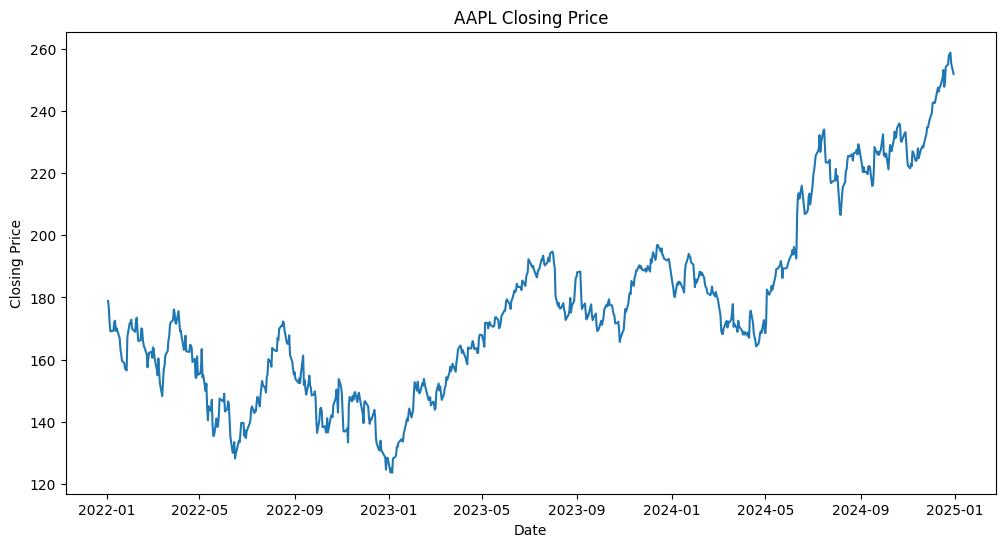

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data["Close"])
plt.title(f"{ticker_symbol} Closing Price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

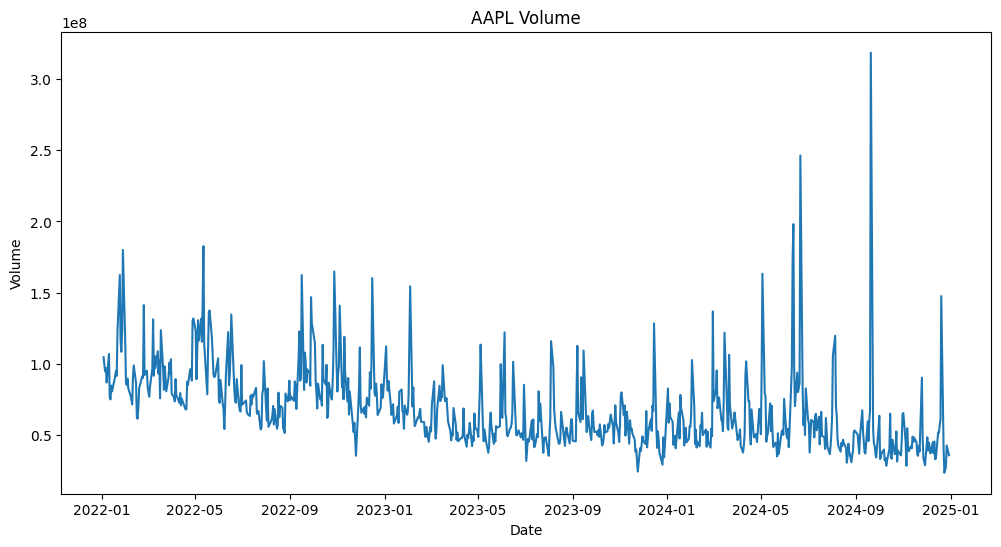

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(data["Volume"])
plt.title(f"{ticker_symbol} Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [12]:
df["Year"] =df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

In [13]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,Year,Month,Day
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
747,2024-12-23,254.989655,255.369227,253.171646,254.490204,40858800,2024,12,23
748,2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700,2024,12,24
749,2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100,2024,12,26
750,2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300,2024,12,27
751,2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500,2024,12,30


In [14]:
df.drop(columns=["Date", "Month", "Day"]).groupby("Year").mean()

<ipython-input-14-867a85bf01f5>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df.drop(columns=["Date", "Month", "Day"]).groupby("Year").mean()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Year,,,,,
2022,152.607554,154.650545,150.494616,152.575785,8.791038e+07
2023,171.093881,172.391077,169.540437,170.804350,5.921703e+07
2024,206.369269,208.063373,204.382100,206.107186,5.719756e+07


In [15]:
yearly = df.drop(columns=["Date", "Month", "Day"]).groupby("Year").std()

<ipython-input-15-375b679f2c8d>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  yearly = df.drop(columns=["Date", "Month", "Day"]).groupby("Year").std()


In [16]:
yearly.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Year,,,,,
2022,12.697923,12.575341,12.753980,12.705787,2.365699e+07
2023,17.399657,17.331271,17.598673,17.596274,1.777392e+07
2024,25.589749,25.661096,25.209018,25.401487,3.087430e+07


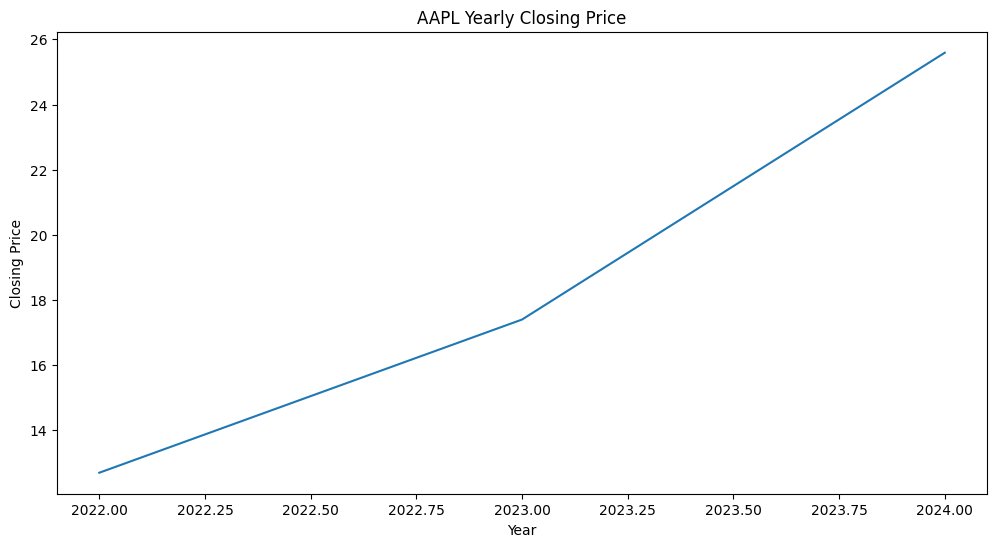

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(yearly["Close"])
plt.title(f"{ticker_symbol} Yearly Closing Price")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.show()

In [18]:
monthly= df.drop(columns=["Date", "Year", "Day"]).groupby("Month").mean()

<ipython-input-18-e1f8c8d9a7ec>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly= df.drop(columns=["Date", "Year", "Day"]).groupby("Month").mean()


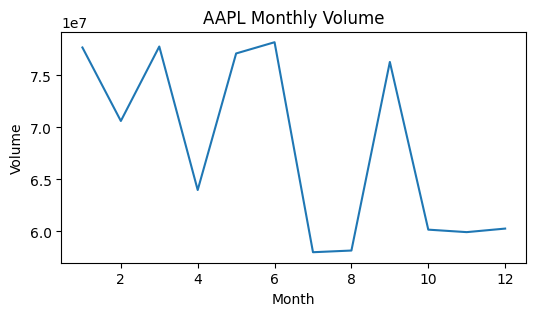

In [19]:
plt.figure(figsize=(6,3))
plt.plot(monthly["Volume"])
plt.title(f"{ticker_symbol} Monthly Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.show()

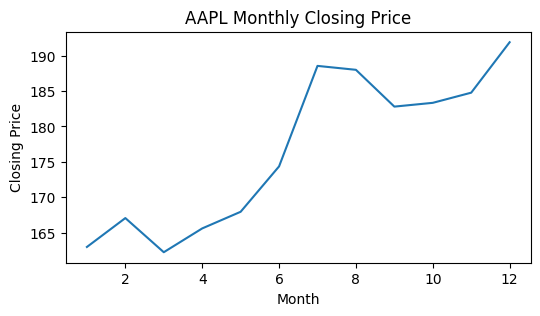

In [20]:
plt.figure(figsize=(6, 3))
plt.plot(monthly["Close"])
plt.title(f"{ticker_symbol} Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Closing Price")
plt.show()

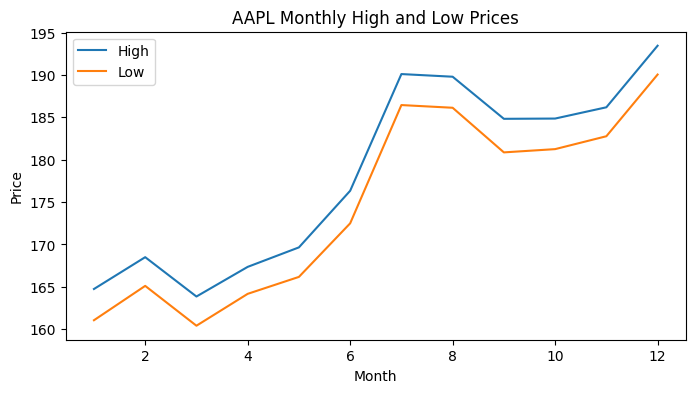

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(monthly["High"])
plt.plot(monthly["Low"])
plt.title(f"{ticker_symbol} Monthly High and Low Prices")
plt.xlabel("Month")
plt.ylabel("Price")
plt.legend(["High", "Low"])
plt.show()

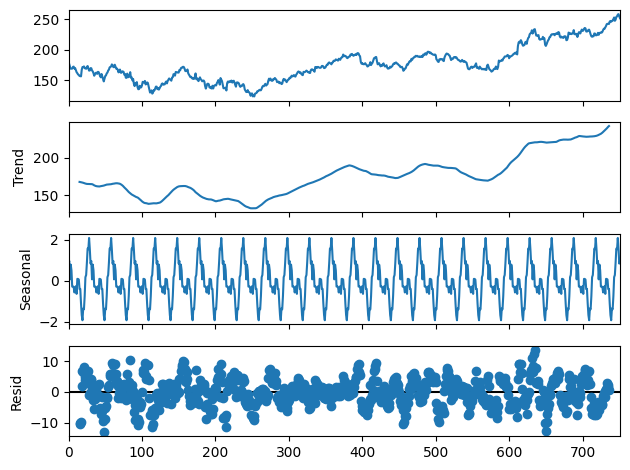

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
decomposition.plot()
plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [54]:
df.head()

Price,Close,High,Low,Open,Volume,Year,Month,Day,Forecast
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2022-01-03,178.879929,179.734977,174.653889,174.771820,104487900,2022,1,3,NaN
2022-01-04,176.609665,179.793951,176.039637,179.489285,99310400,2022,1,4,NaN
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600,2022,1,5,NaN
2022-01-06,169.042084,172.285336,168.688274,169.730043,96904000,2022,1,6,NaN
2022-01-07,169.209137,171.145259,168.088742,169.916756,86709100,2022,1,7,NaN


In [33]:
df['Forecast'] = model_fit.predict(start=len(df)-50, end=len(df)+5, dynamic=True)

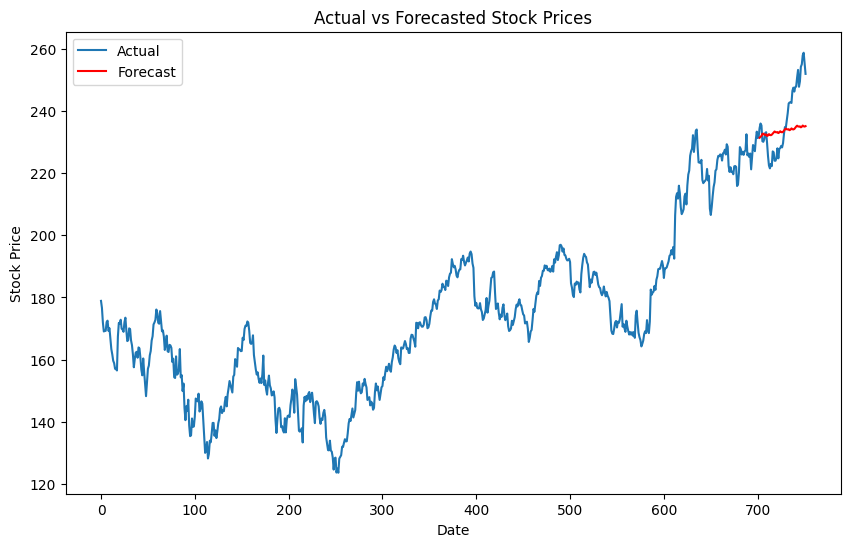

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(df['Forecast'], label='Forecast', color='red')
plt.title('Actual vs Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

In [37]:
test_actual = df['Close'][-50:]
test_forecast = df['Forecast'][-50:]

In [38]:
mae = mean_absolute_error(test_actual, test_forecast)
mse = mean_squared_error(test_actual, test_forecast)

In [39]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 8.72754835701187
Mean Squared Error (MSE): 113.59002860865719


In [ ]:
df.set_index('Date', inplace=True)

In [41]:
forecast_steps = 365
future_forecast = model_fit.predict(start=len(df), end=len(df) + forecast_steps - 1, dynamic=True)


In [42]:
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='B')[1:]

In [43]:
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast})

In [44]:
forecast_df.set_index('Date', inplace=True)

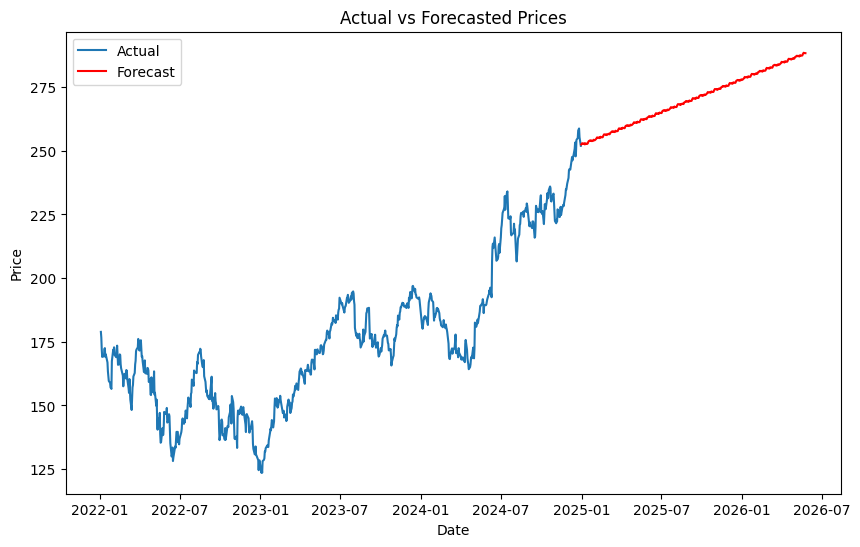

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Actual vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [70]:
filtered_data.head()

Price,Date,Close,High,Low,Open,Volume,Year,Month,Day,Forecast
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
0,2022-01-03,178.879929,179.734977,174.653889,174.771820,104487900,2022,1,3,NaN
1,2022-01-04,176.609665,179.793951,176.039637,179.489285,99310400,2022,1,4,NaN
2,2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600,2022,1,5,NaN
3,2022-01-06,169.042084,172.285336,168.688274,169.730043,96904000,2022,1,6,NaN
4,2022-01-07,169.209137,171.145259,168.088742,169.916756,86709100,2022,1,7,NaN


In [71]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        752 non-null    datetime64[ns]
 1   (Close, AAPL)   752 non-null    float64       
 2   (High, AAPL)    752 non-null    float64       
 3   (Low, AAPL)     752 non-null    float64       
 4   (Open, AAPL)    752 non-null    float64       
 5   (Volume, AAPL)  752 non-null    int64         
 6   (Year, )        752 non-null    int32         
 7   (Month, )       752 non-null    int32         
 8   (Day, )         752 non-null    int32         
 9   (Forecast, )    50 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 50.1 KB
